In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [212]:
df = pd.read_csv('dataset/Animal_Shelter_Intake_and_Outcome.csv', sep=';')

Name - Name of the animal. Animal names with an asterisk before them were given by shelter staff.<br>
Type - Type of animal<br>
Breed - Breed of animal<br>
Color - Color of animal, Black, Chocolate, White….
<br>Sex - Male, Female, Neutered Male, Spayed Female
<br>Size - Large, medium, small, toy
<br>Date Of Birth - Approximate date of birth.
<br>Impound Number - Animal impound number
<br>Kennel Number - Kennel number indicating its current location.
<br>Animal ID - Unique ID
<br>Intake Date	- Date animal was taken into the shelter
<br>Outcome Date - Date animal left the shelter
<br>Days in Shelter	- Number of days the animal was in the shelter
<br>Intake Type	- Reason for intake
<br>Intake Subtype - Sub reason for intake
<br>Outcome Type - Reason for release from shelter
<br>Outcome Subtype	- Sub reason for release from shelter
<br>Intake Condition - Animals condition at intake
<br>Outcome Condition - Animals condition at release from shelter
<br>Intake Jurisdiction	- Jurisdiction responsible for animal intake
<br>Outcome Jurisdiction - Area animal went to.
<br>Outcome Zip Code - Zip code where animal went to.
<br>Location - Latitude, Longitude coordinates for outcome jurisdiction
<br>Count - Column for performing arithmetic and creating groups for views and visualizations

## Null check

In [213]:
df.isnull().sum()

Name                    6670
Type                       0
Breed                      0
Color                      0
Sex                        0
Size                      35
Date Of Birth           6329
Impound Number             0
Kennel Number             30
Animal ID                  0
Intake Date                0
Outcome Date             211
Days in Shelter            0
Intake Type                0
Intake Subtype             0
Outcome Type             217
Outcome Subtype          537
Intake Condition           0
Outcome Condition        564
Intake Jurisdiction        0
Outcome Jurisdiction    3668
Outcome Zip Code        3724
Location                3724
Count                      0
dtype: int64

In [214]:
df = df.drop(['Impound Number', 'Animal ID'], axis=1)

## Names analysis

In [215]:
unique_names = df['Name'].unique().tolist()
unique_names[:10]

['RAZOR',
 nan,
 'CHLOE',
 'MAX',
 'OSO',
 'FELLA',
 'PUDGY',
 'LEXI',
 'KENJI',
 'SONOMA']

In [216]:
import re
for name in unique_names:
    if name is np.nan:
        continue
    else:
        if re.match("^[a-zA-Z0-9_]*$", name):
            continue
        else:
            print(name)

*TABITHA
*PEPPER
SIR DUNCAN NEPAL
*RYAN
*MICHAELA
*SQUID
*TED
*SPROUT
*JENNY
TURKEY VULTURE
*CHECKERS
*CODY
*LUZ
*GINNY
*CASHEW
*GRACE
*TWINKLES
*PHOENIX
*TUCKER
PIGGY PIGGY
*GEORGE
*MULAN
KITTY KITTY
*SPARKLE
*SHINE
*LILLY
*FREDDY
NINA BEAR
LITTLE BUDDY
*LUCKY
*BUTTERCUP
KITTY BOY
*MILA
*NALA
*SID
*BRIAN
*SPRECKLES
*KIT
*BILLY
*PIE
*SADIE
*SULLI
*CUTIE
*GALAPAGOS
COCO CHANEL
*CHANCE
*CLOWN
*PERSIMMON
*JULIETTE
*VIXEN
* ROBIN
*BOOTSIE
*ALVIE
*STELLA
*LLOYD
*HONEY
*ASTRO
*TANGO
*AVA
*SQUEAK
*TILLY
*OISHI
*APOLLO
*ZOOM
*MOCHA
*LONNIE
*LUCY
*MALCOLM
*SPROCKET
*BUTTERBALL
*PHILLIP
*LOCKET
*ROCKET
DESI LU
*LATTE
*CANDY
*WIDGET
*PRETZEL
*CHESS
*POCKET
*BEANS
*JOHNNY
*RADISH
PRINCE HENRY
*GLADYS
*KEANU
LOU DOG
*BASIL
*TAMMY
*PYRITE
*OBSIDIAN
*CELESTITE
*DOTTIE
*TURNER
*BETH
*KELLY
*MELVIN
*JOE
*MEG
*SLEEPY
*JUNE
*ONYX
*BAMBI
*SAPHIRA
*BITSY
*TOPAZ
*AGATE
*GALENA
*MOONSTONE
*HUCKLEBERRY
*MUNCHIE
*RUFUS
*CHAMP
*MELODY
EMMA LOU
*GERTRUDE
*GRAHAM
*VINCE
*PO BOY
*PAULA
BLUES CLUES
*WENDY
*JOKER
*R

In [217]:
df['Name'] = df['Name'].str.replace('*', '')
df['Name']

0          RAZOR
1            NaN
2            NaN
3            NaN
4          CHLOE
          ...   
25430       BUBA
25431    JESSICA
25432     SHINER
25433     NEWTON
25434        NaN
Name: Name, Length: 25435, dtype: object

In [218]:
unique_names_count = df['Name'].value_counts()
unique_names_count

Name
BUDDY         143
BELLA         135
LUNA          133
LUCY          118
MAX           111
             ... 
SCOOBY DOO      1
REGULO          1
BB              1
ANA             1
SHINER          1
Name: count, Length: 5649, dtype: int64

## Type analysis

In [219]:
unique_types = df['Type'].unique().tolist()
unique_types

['DOG', 'OTHER', 'CAT']

In [220]:
otherAnimals = df[df["Type"] == "OTHER"]
otherAnimals

,Name,Type,Breed,Color,Sex,Size,Date Of Birth,Kennel Number,Intake Date,Outcome Date,...,Intake Subtype,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count
5,NaN,OTHER,PIGEON,GRAY/WHITE,Unknown,SMALL,NaN,TRUCK,03/15/2023,03/15/2023,...,FIELD,EUTHANIZE,INJ SEVERE,UNKNOWN,HEALTHY,SANTA ROSA,NaN,NaN,NaN,1
12,NaN,OTHER,BAT,BLACK,Unknown,SMALL,NaN,EUTH,03/13/2023,03/13/2023,...,FIELD,EUTHANIZE,FRA,UNKNOWN,UNTREATABLE,COUNTY,NaN,NaN,NaN,1
14,SONOMA,OTHER,HORSE,BROWN/BLACK,Female,LARGE,NaN,CHANGE,11/15/2021,03/15/2023,...,FLD_HOSPTL,TRANSFER,NaN,UNKNOWN,TREATABLE/REHAB,COUNTY,COUNTY,95404.0,"95404(38.43807, -122.71247)",1
17,NaN,OTHER,BAT/MEX FREE-TAIL,GRAY,Unknown,SMALL,NaN,TRUCK,03/15/2023,03/15/2023,...,FIELD,EUTHANIZE,FRA,UNKNOWN,HEALTHY,COUNTY,NaN,NaN,NaN,1
20,SATIN,OTHER,HORSE,BLACK/WHITE,Female,LARGE,NaN,CHANGE,11/15/2021,03/15/2023,...,FLD_HOSPTL,TRANSFER,NaN,UNKNOWN,TREATABLE/REHAB,COUNTY,COUNTY,95404.0,"95404(38.43807, -122.71247)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25320,NaN,OTHER,RABBIT SH,BLACK/WHITE,Unknown,SMALL,06/23/2016,CA01,06/23/2016,06/23/2016,...,BORN_HERE,EUTHANIZE,UNDERAGEWT,UNTREATABLE,UNTREATABLE,COUNTY,NaN,NaN,NaN,1
25400,NaN,OTHER,CHICKEN,BROWN,Female,SMALL,NaN,LS01,02/01/2019,02/14/2019,...,FIELD,ADOPTION,FB OTHER,UNKNOWN,PENDING,COUNTY,OUT OF COUNTY,95482.0,"95482(39.15093, -123.2079)",1
25423,NaN,OTHER,BAT,BROWN,Unknown,SMALL,NaN,TRUCK,08/18/2020,08/18/2020,...,FIELD,NaN,NaN,UNKNOWN,NaN,COUNTY,NaN,NaN,NaN,1
25431,JESSICA,OTHER,AMERICAN,WHITE/BROWN,Spayed,SMALL,11/08/2017,CA01,06/20/2018,10/10/2018,...,OVER THE COUNTER,TRANSFER,HSSC,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,95407.0,"95407(38.41483, -122.72707)",1


## Breed analysis

In [221]:
uniqueBreedsOfDifferentAnimals = otherAnimals['Breed'].value_counts().to_dict()
uniqueBreedsOfDifferentAnimals

{'CHICKEN': 419,
 'RABBIT SH': 364,
 'BAT': 244,
 'GUINEA PIG': 114,
 'GOAT': 95,
 'SHEEP': 64,
 'HORSE': 49,
 'RAT': 49,
 'PIG': 47,
 'PARAKEET': 44,
 'PIGEON': 34,
 'KOI': 25,
 'PEAFOWL': 24,
 'COCKATIEL': 23,
 'LOP-MINI': 22,
 'HAMSTER': 21,
 'DUCK': 20,
 'REX': 18,
 'GOOSE': 18,
 'RACCOON': 17,
 'ENGLISH SPOT/MIX': 14,
 'RABBIT LH': 14,
 'AMERICAN': 14,
 'LOP-ENGLISH': 13,
 'HOTOT': 11,
 'LOP-HOLLAND': 11,
 'CANARY': 10,
 'OPOSSUM': 9,
 'DUTCH/MIX': 9,
 'CALIFORNIAN': 8,
 'CALIFORNIAN/MIX': 8,
 'LOP-AMER FUZZY': 8,
 'ENGLISH SPOT': 8,
 'MOUSE': 8,
 'FINCH': 8,
 'GOAT/BOER': 7,
 'PARROT': 7,
 'NEW ZEALAND WHT': 7,
 'GOAT/LA MANCHA': 7,
 'POTBELLY PIG': 7,
 'DOVE': 7,
 'HAVANA/MIX': 7,
 'BAT/MEX FREE-TAIL': 7,
 'SKUNK': 7,
 'TURTLE': 7,
 'DUTCH': 6,
 'REX/MIX': 6,
 'BOER': 5,
 'TROPICAL': 5,
 'NETHERLND DWARF': 5,
 'HAVANA': 5,
 'LOP-MINI/MIX': 5,
 'FOX': 4,
 'TURKEY': 4,
 'TORTOISE': 4,
 'FLEMISH GIANT': 4,
 'ANGUS': 4,
 'LOP-ENGLISH/MIX': 4,
 'MACAW': 4,
 'GOAT/PYGMY': 4,
 'LOP-FRE

Zbiór zwiera różne zwierzęta

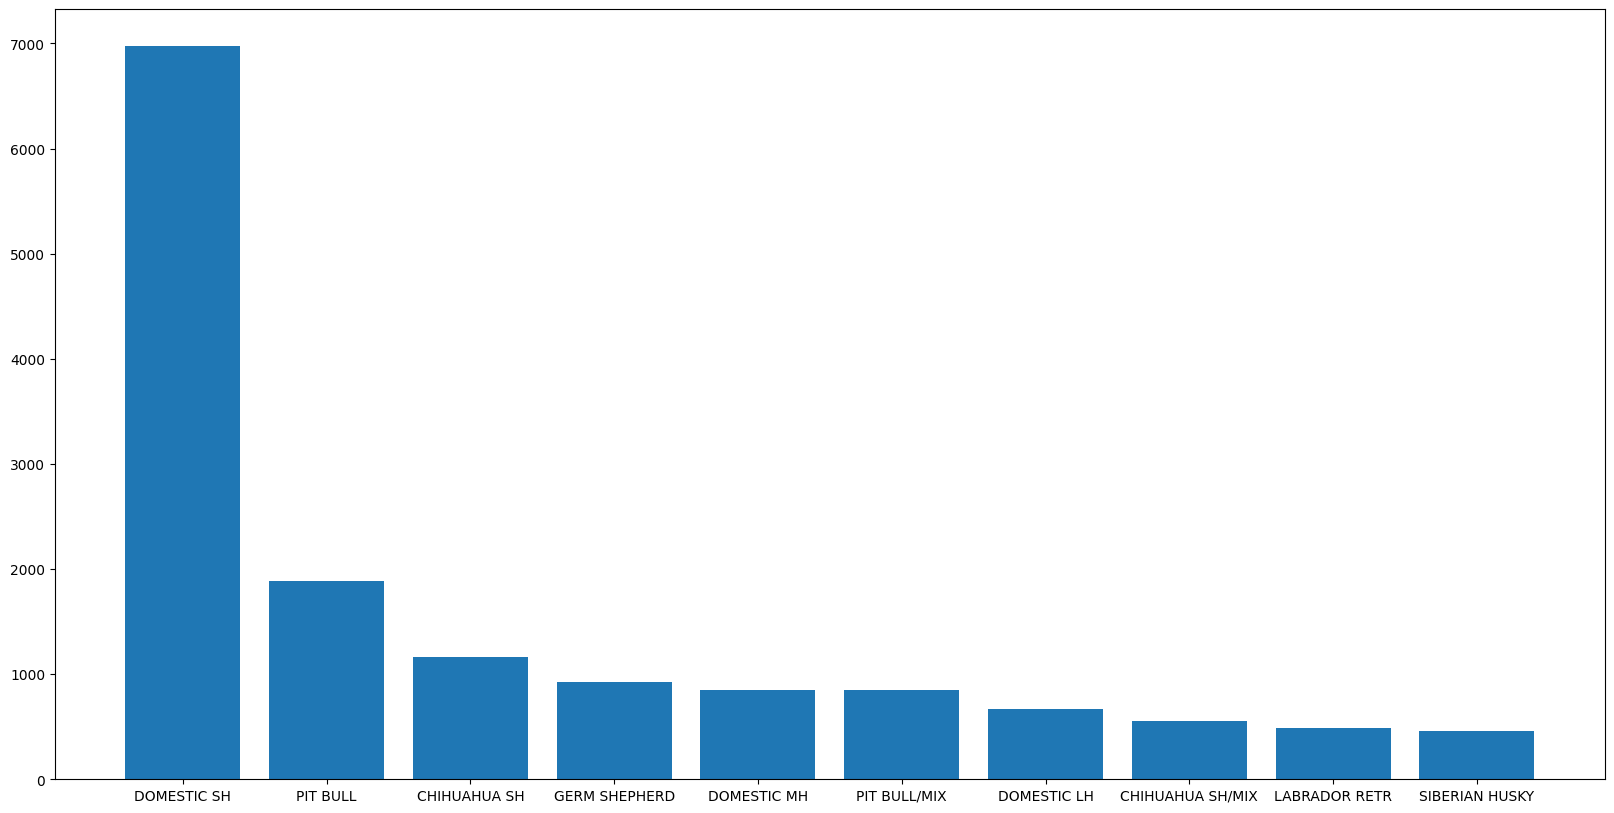

In [222]:
topTenBreeds = df["Breed"].value_counts().head(10)
topTenBreeds = topTenBreeds.to_dict()
plt.figure(figsize=(20,10))
plt.bar(topTenBreeds.keys(), topTenBreeds.values())
plt.show()

In [223]:
df = df.drop('Outcome Zip Code', axis=1)
# df = df.drop('Intake Date', axis=1)
df = df.drop('Outcome Date', axis=1)
#df = df.drop('Outcome Type', axis=1)
df = df.drop('Outcome Subtype', axis=1)
#df = df.drop('Intake Jurisdiction', axis=1)
df = df.drop('Name', axis=1)

In [224]:
#df = df.drop('Outcome Condition', axis=1)
#df = df.drop('Outcome Jurisdiction', axis=1)
df = df.drop('Count', axis=1)

In [225]:
# df.drop(df[df["Days in Shelter"] == "0"].index, inplace=True)
# df

In [226]:
df["Sex"].unique()

array(['Neutered', 'Female', 'Unknown', 'Spayed', 'Male'], dtype=object)

In [227]:
# df = df.replace("Neutered", "Male")
# df = df.replace("Spayed", "Female")

In [228]:
df["Size"].unique()

array(['SMALL', 'MED', 'X-LRG', 'KITTN', 'LARGE', 'PUPPY', 'TOY', nan],
      dtype=object)

In [229]:
# df = df.replace("KITTN", "SMALL")
# df = df.replace("PUPPY", "SMALL")
# df = df.replace("TOY", "SMALL")
df = df.replace("MED", "MEDIUM")
# df = df.replace("X-LRG", "LARGE")
df['Size'] = df['Size'].fillna("MEDIUM")

In [230]:
df["Size"].unique()

array(['SMALL', 'MEDIUM', 'X-LRG', 'KITTN', 'LARGE', 'PUPPY', 'TOY'],
      dtype=object)

In [231]:
df

,Type,Breed,Color,Sex,Size,Date Of Birth,Kennel Number,Intake Date,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Location
0,DOG,BOSTON TERRIER,BLACK/WHITE,Neutered,SMALL,10/29/2009,TRUCK,12/26/2022,0,STRAY,FIELD,RETURN TO OWNER,UNKNOWN,HEALTHY,SANTA ROSA,SANTA ROSA,"95404(38.43807, -122.71247)"
1,DOG,GERM SHEPHERD/MIX,BLACK/BROWN,Neutered,MEDIUM,NaN,DS53,05/18/2023,3,STRAY,OVER THE COUNTER,TRANSFER,UNKNOWN,HEALTHY,COUNTY,COUNTY,"94951(38.29715, -122.66645)"
2,DOG,SIBERIAN HUSKY/MIX,RED,Female,MEDIUM,NaN,DS49,05/18/2023,3,STRAY,OVER THE COUNTER,TRANSFER,UNKNOWN,HEALTHY,COUNTY,COUNTY,"94951(38.29715, -122.66645)"
3,DOG,GERM SHEPHERD,BLACK/BROWN,Neutered,MEDIUM,NaN,DS60,05/18/2023,3,STRAY,OVER THE COUNTER,TRANSFER,UNKNOWN,HEALTHY,COUNTY,COUNTY,"94951(38.29715, -122.66645)"
4,DOG,SIBERIAN HUSKY,BLACK/WHITE,Female,SMALL,05/18/2022,DS62,05/18/2023,3,STRAY,FIELD,TRANSFER,UNKNOWN,HEALTHY,COUNTY,COUNTY,"94951(38.29715, -122.66645)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25430,CAT,DOMESTIC SH,GRAY/WHITE,Neutered,SMALL,10/15/2017,CA02,10/03/2019,20,STRAY,OVER THE COUNTER,ADOPTION,HEALTHY,HEALTHY,SANTA ROSA,*HEALDSBURG,"95448(38.61064, -122.86883)"
25431,OTHER,AMERICAN,WHITE/BROWN,Spayed,SMALL,11/08/2017,CA01,06/20/2018,112,STRAY,OVER THE COUNTER,TRANSFER,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,"95407(38.41483, -122.72707)"
25432,DOG,PIT BULL,TAN/WHITE,Neutered,LARGE,12/22/2012,DS70,09/11/2014,21,STRAY,OVER THE COUNTER,EUTHANIZE,UNTREATABLE,UNTREATABLE,SANTA ROSA,COUNTY,"95476(38.29188, -122.45728)"
25433,DOG,CHIHUAHUA SH/MIX,BROWN/WHITE,Neutered,SMALL,07/28/2011,DS91,07/02/2020,49,STRAY,FIELD,TRANSFER,HEALTHY,HEALTHY,SANTA ROSA,OUT OF COUNTY,94146


In [232]:
# df.drop(df[df["Intake Condition"] == "UNKNOWN"].index, inplace=True)
df

,Type,Breed,Color,Sex,Size,Date Of Birth,Kennel Number,Intake Date,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Location
0,DOG,BOSTON TERRIER,BLACK/WHITE,Neutered,SMALL,10/29/2009,TRUCK,12/26/2022,0,STRAY,FIELD,RETURN TO OWNER,UNKNOWN,HEALTHY,SANTA ROSA,SANTA ROSA,"95404(38.43807, -122.71247)"
1,DOG,GERM SHEPHERD/MIX,BLACK/BROWN,Neutered,MEDIUM,NaN,DS53,05/18/2023,3,STRAY,OVER THE COUNTER,TRANSFER,UNKNOWN,HEALTHY,COUNTY,COUNTY,"94951(38.29715, -122.66645)"
2,DOG,SIBERIAN HUSKY/MIX,RED,Female,MEDIUM,NaN,DS49,05/18/2023,3,STRAY,OVER THE COUNTER,TRANSFER,UNKNOWN,HEALTHY,COUNTY,COUNTY,"94951(38.29715, -122.66645)"
3,DOG,GERM SHEPHERD,BLACK/BROWN,Neutered,MEDIUM,NaN,DS60,05/18/2023,3,STRAY,OVER THE COUNTER,TRANSFER,UNKNOWN,HEALTHY,COUNTY,COUNTY,"94951(38.29715, -122.66645)"
4,DOG,SIBERIAN HUSKY,BLACK/WHITE,Female,SMALL,05/18/2022,DS62,05/18/2023,3,STRAY,FIELD,TRANSFER,UNKNOWN,HEALTHY,COUNTY,COUNTY,"94951(38.29715, -122.66645)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25430,CAT,DOMESTIC SH,GRAY/WHITE,Neutered,SMALL,10/15/2017,CA02,10/03/2019,20,STRAY,OVER THE COUNTER,ADOPTION,HEALTHY,HEALTHY,SANTA ROSA,*HEALDSBURG,"95448(38.61064, -122.86883)"
25431,OTHER,AMERICAN,WHITE/BROWN,Spayed,SMALL,11/08/2017,CA01,06/20/2018,112,STRAY,OVER THE COUNTER,TRANSFER,HEALTHY,HEALTHY,SANTA ROSA,COUNTY,"95407(38.41483, -122.72707)"
25432,DOG,PIT BULL,TAN/WHITE,Neutered,LARGE,12/22/2012,DS70,09/11/2014,21,STRAY,OVER THE COUNTER,EUTHANIZE,UNTREATABLE,UNTREATABLE,SANTA ROSA,COUNTY,"95476(38.29188, -122.45728)"
25433,DOG,CHIHUAHUA SH/MIX,BROWN/WHITE,Neutered,SMALL,07/28/2011,DS91,07/02/2020,49,STRAY,FIELD,TRANSFER,HEALTHY,HEALTHY,SANTA ROSA,OUT OF COUNTY,94146


In [233]:
sorted(df["Color"].unique())

['AGOUTI',
 'APRICOT',
 'APRICOT/WHITE',
 'BL BRINDLE',
 'BL BRINDLE/BLACK',
 'BL BRINDLE/GRAY',
 'BL BRINDLE/TAN',
 'BL BRINDLE/WHITE',
 'BLACK',
 'BLACK/BL BRINDLE',
 'BLACK/BLACK',
 'BLACK/BLK SMOKE',
 'BLACK/BLK TABBY',
 'BLACK/BLUE',
 'BLACK/BLUE MERLE',
 'BLACK/BLUE TICK',
 'BLACK/BR BRINDLE',
 'BLACK/BRN MERLE',
 'BLACK/BROWN',
 'BLACK/CHOCOLATE',
 'BLACK/CREAM',
 'BLACK/GOLD',
 'BLACK/GRAY',
 'BLACK/ORANGE',
 'BLACK/PURPLE',
 'BLACK/RED',
 'BLACK/SILVER',
 'BLACK/TAN',
 'BLACK/TRICOLOR',
 'BLACK/WHITE',
 'BLACK/YELLOW',
 'BLK SMOKE',
 'BLK SMOKE/WHITE',
 'BLK TABBY',
 'BLK TABBY/GRAY',
 'BLK TABBY/GRAY TIGER',
 'BLK TABBY/TORTIE',
 'BLK TABBY/WHITE',
 'BLK TIGER/GRAY',
 'BLK TIGER/TAN',
 'BLONDE',
 'BLUE',
 'BLUE CREAM',
 'BLUE CREAM/BRN TABBY',
 'BLUE CREAM/CALICO',
 'BLUE CREAM/TORTIE',
 'BLUE CREAM/WHITE',
 'BLUE MERLE',
 'BLUE MERLE/BLACK',
 'BLUE MERLE/GRAY',
 'BLUE MERLE/TAN',
 'BLUE MERLE/WHITE',
 'BLUE PT',
 'BLUE PT/WHITE',
 'BLUE TABBY',
 'BLUE TICK',
 'BLUE TICK/BLAC

In [234]:
len(df["Color"].unique())

340

In [235]:
def check_and_replace_color(colors):
    unique_colors = {}
    
    for color in colors:
        parts = color.split("/")
        if len(parts) == 2:
            reversed_color = "/".join(reversed(parts))
            if reversed_color in unique_colors:
                unique_colors[color] = unique_colors[reversed_color]
            else:
                unique_colors[color] = color
        else:
            unique_colors[color] = color
    
    updated_colors = [unique_colors[color] for color in colors]
    return updated_colors

In [236]:
def replace_same_colors(colors):
    updated_colors = []
    
    for color in colors:
        parts = color.split("/")
        if len(parts) == 2 and parts[0] == parts[1]:
            updated_colors.append(parts[0])
        else:
            updated_colors.append(color)
    
    return updated_colors

In [237]:
# not_fixed_colors = df["Color"].copy()
# df["Color"] = check_and_replace_color(df["Color"])
# df["Color"] = replace_same_colors(df["Color"])

In [238]:
# len(not_fixed_colors.unique())

In [239]:
len(df["Color"].unique())

340

In [240]:
# colors = df["Color"].value_counts()
# colors[colors < 20]
# df["Color"] = df["Color"].apply(lambda x: "OTHER" if x in colors[colors < 20] else x)

In [241]:
# unique_colors_before = not_fixed_colors.unique()
# unique_colors_after = df["Color"].unique()

In [242]:
# diff = len(unique_colors_before) - len(unique_colors_after)

# tmp = list(unique_colors_after)
# for i in range(diff):
#     tmp.append(0)
    
# unique_colors_after = np.asarray(tmp)

# data = {
#     "Before": unique_colors_before,
#     "After": unique_colors_after
# }

# df_for_colors_check = pd.DataFrame(data)
# df_for_colors_check
# df_for_colors_check.to_csv("./test_data/test.csv")

In [243]:
df["Intake Condition"].unique()

array(['UNKNOWN', 'HEALTHY', 'TREATABLE/MANAGEABLE', 'TREATABLE/REHAB',
       'UNTREATABLE'], dtype=object)

In [244]:
# df = df.replace("TREATABLE/MANAGEABLE", "TREATABLE")
# df = df.replace("TREATABLE/REHAB", "TREATABLE")

In [245]:
df[df["Days in Shelter"].str.contains(",")]

,Type,Breed,Color,Sex,Size,Date Of Birth,Kennel Number,Intake Date,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Location
18320,DOG,GOLDEN RETR,GOLD,Neutered,LARGE,10/27/2014,FREEZER,05/07/2018,"1,239",CONFISCATE,FLD_CORONR,DISPOSAL,UNKNOWN,DEAD,COUNTY,COUNTY,"94952(38.23262, -122.64426)"


In [246]:
df['Days in Shelter'] = df['Days in Shelter'].str.replace(',', '')

In [247]:
df[df["Days in Shelter"].str.contains(",")]

,Type,Breed,Color,Sex,Size,Date Of Birth,Kennel Number,Intake Date,Days in Shelter,Intake Type,Intake Subtype,Outcome Type,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Location


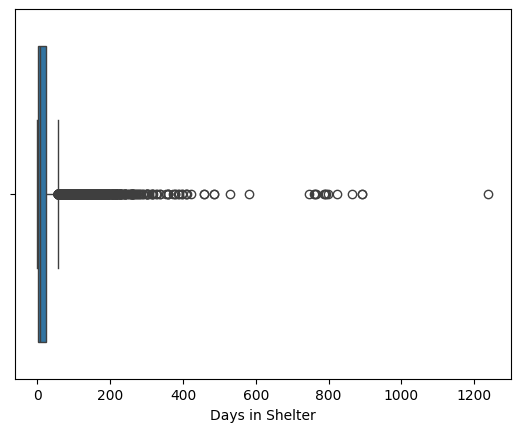

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns

df["Days in Shelter"] = df["Days in Shelter"].astype(float)
sns.boxplot(x=df["Days in Shelter"])
plt.show()


In [249]:
df[df["Days in Shelter"] > 50].count()

Type                    2100
Breed                   2100
Color                   2100
Sex                     2100
Size                    2100
Date Of Birth           1909
Kennel Number           2100
Intake Date             2100
Days in Shelter         2100
Intake Type             2100
Intake Subtype          2100
Outcome Type            2099
Intake Condition        2100
Outcome Condition       2089
Intake Jurisdiction     2100
Outcome Jurisdiction    1923
Location                1915
dtype: int64

In [250]:
# df.drop(df[df["Days in Shelter"] > 50].index, inplace=True)
# df

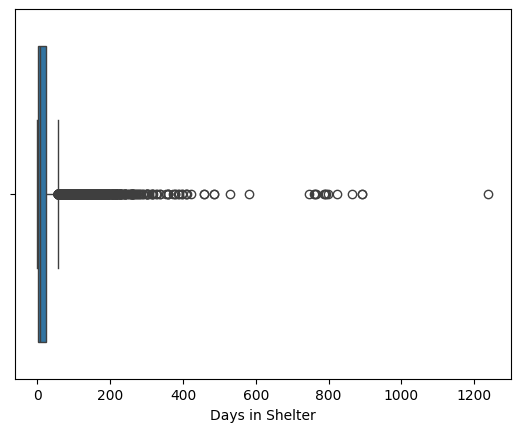

In [251]:
sns.boxplot(x=df["Days in Shelter"])
plt.show()

In [252]:
df.isnull().sum()

Type                       0
Breed                      0
Color                      0
Sex                        0
Size                       0
Date Of Birth           6329
Kennel Number             30
Intake Date                0
Days in Shelter            0
Intake Type                0
Intake Subtype             0
Outcome Type             217
Intake Condition           0
Outcome Condition        564
Intake Jurisdiction        0
Outcome Jurisdiction    3668
Location                3724
dtype: int64

In [253]:
from datetime import datetime

df.dropna(subset=['Date Of Birth'], inplace=True)
intake_date = pd.to_datetime(df["Intake Date"])
df["Date Of Birth"] = pd.to_datetime(df["Date Of Birth"])
df['Age'] = (intake_date - df['Date Of Birth']).astype(int)
df.drop(['Date Of Birth'], axis=1, inplace=True)
df

TypeError: Converting from timedelta64[ns] to int32 is not supported. Do obj.astype('int64').astype(dtype) instead

In [ ]:
df["Age"].unique()

In [ ]:
sns.boxplot(x=df["Age"])
plt.show()

In [ ]:
# df.drop(df[df["Age"] > 20].index, inplace=True)
# df

In [ ]:
# df.drop(df[df["Sex"] == "Unknown"].index, inplace=True)
# df

In [ ]:
other_types = df[df["Type"] == "OTHER"]
other_types["Breed"].unique()

In [ ]:
# df.loc[(df["Type"] == "OTHER") & (df["Breed"] == "PALOMINO/MIX"), "Breed"] = "PALOMINO"

In [ ]:
other_types = df[df["Type"] == "OTHER"]
other_types["Breed"].unique()

In [ ]:
# df.loc[(df["Type"] == "OTHER") & (df["Breed"].str.contains("MIX")), "Breed"] = "MIX"

In [ ]:
other_types = df[df["Type"] == "OTHER"]
other_types["Breed"].unique()

In [ ]:
# df.loc[(df["Type"] == "OTHER") & (df["Breed"].str.contains("GOAT")), "Breed"] = "GOAT"

In [ ]:
other_types = df[df["Type"] == "OTHER"]
other_types["Breed"].unique()

In [ ]:
# df.loc[(df["Type"] == "OTHER") & (df["Breed"] == "AMERICAN/REX"), "Breed"] = "MIX"

In [ ]:
other_types = df[df["Type"] == "OTHER"]
other_types["Breed"].unique()

In [ ]:
# df.loc[(df["Type"] == "OTHER") & (df["Breed"].isin(["RABBIT SH", "RABBIT LH"])), "Breed"] = "RABBIT"

In [ ]:
# rabbit_breeds = ["LOP-AMER FUZZY",
#                     "LOP-HOLLAND",
#                     "RABBIT",
#                     "DWARF HOTOT",
#                     "MIX",
#                     "REX",
#                     "LOP-MINI",
#                     "LOP-FRENCH",
#                     "SILVER",
#                     "HOTOT",
#                     "ANGORA-ENGLISH",
#                     "DUTCH",
#                     "AMERICAN",
#                     "CALIFORNIAN",
#                     "LOP-ENGLISH",
#                     "ENGLISH SPOT"]

# df.loc[(df["Type"] == "OTHER") & (df["Breed"].isin(rabbit_breeds)), "Breed"] = "RABBIT"

# roden_breeds = ["GUINEA PIG",
#                 "HAMSTER",
#                 "RAT",
#                 "MOUSE"]

# df.loc[(df["Type"] == "OTHER") & (df["Breed"].isin(roden_breeds)), "Breed"] = "RODENT"

# live_stock_breeds = ["GOAT",
#                     "CHICKEN",
#                     "SHEEP",
#                     "BOER",
#                     "BARRED ROCK"]

# df.loc[(df["Type"] == "OTHER") & (df["Breed"].isin(live_stock_breeds)), "Breed"] = "LIVESTOCK"

# bird_breeds = ["PARAKEET",
#                 "COCKATIEL",
#                 "CANARY",
#                 "DOVE"]

# df.loc[(df["Type"] == "OTHER") & (df["Breed"].isin(bird_breeds)), "Breed"] = "BIRD"

# horse_breeds = ["HORSE",
#                 "SHETLAND",
#                 "PALOMINO"]

# df.loc[(df["Type"] == "OTHER") & (df["Breed"].isin(horse_breeds)), "Breed"] = "HORSE"

# if "RACCOON" in df["Breed"].values:
#     df.loc[df["Breed"] == "RACCOON", "Type"] = "RACCOON"

In [ ]:
dog_types = df[df["Type"] == "DOG"]
sorted(dog_types["Breed"].unique())

In [ ]:
len(dog_types["Breed"].unique())

In [ ]:
# df.loc[(df["Type"] == "DOG") & (df["Breed"].str.contains("/")), "Breed"] = "MIX"

In [ ]:
dog_types = df[df["Type"] == "DOG"]
len(dog_types["Breed"].unique())

In [ ]:
df.isnull().sum()

In [ ]:
# df.drop(df[df["Type"] == "OTHER"].index, inplace=True)

In [ ]:
breed_counts = df["Breed"].value_counts() 
breed_counts

In [ ]:
# df = df[~df["Breed"].isin(breed_counts[breed_counts < 20].index)]

In [ ]:
df["Breed"].value_counts() 

In [ ]:
df["Days in Shelter"]

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

encoder = LabelEncoder()

df = df.apply(encoder.fit_transform)
df

In [ ]:
decision = df["Days in Shelter"]
attributes = df.drop("Days in Shelter", axis=1)

In [ ]:
attributes

In [ ]:
decision

In [ ]:
attributes.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_attributes = scaler.fit_transform(attributes)
scaled_attributes

In [ ]:
scaled_decision = scaler.fit_transform(decision.values.reshape(-1, 1))
scaled_decision

In [ ]:
test_df = pd.DataFrame(np.concatenate((scaled_attributes, scaled_decision), axis=1), columns=df.columns)
test_df
test_df.to_csv("./test_data/scaled_dataframe.csv")

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(attributes, decision, test_size=0.3, random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
scaled_X_train, scaled_X_temp, scaled_y_train, scaled_y_temp = train_test_split(scaled_attributes, decision, test_size=0.3, random_state=42)
scaled_X_val, scaled_X_test, scaled_y_val, scaled_y_test = train_test_split(scaled_X_temp, scaled_y_temp, test_size=0.5, random_state=42)

In [ ]:
def graph_for_model(y_val, y_pred, model_name):
    plt.figure(figsize=(8, 8))
    plt.scatter(y_val, y_pred, c='b', marker='o', label='Actual vs. Predicted')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('MODEL - {model_name}'.format(model_name=model_name))
    plt.legend(loc='upper left')
    plt.grid(True)

    plt.show()

Random forest

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from decimal import Decimal

model_LinearRegression = LinearRegression()
model_LinearRegression.fit(X_train, y_train)
y_pred_LinearRegression = model_LinearRegression.predict(X_val)
mae_LinearRegression = mean_absolute_error(scaled_y_val, y_pred_LinearRegression)
r2_LinearRegression = r2_score(scaled_y_val, y_pred_LinearRegression)

rounded_rmse_LinearRegression = round(mae_LinearRegression, 3)
rounded_r2_LinearRegression = round(r2_LinearRegression, 3)

print("Mean Absolute Error:", Decimal(str(rounded_rmse_LinearRegression)))
print("R^2 Score:", Decimal(str(rounded_r2_LinearRegression)))


In [ ]:
graph_for_model(scaled_y_val, y_pred_LinearRegression, "Linear Regression")

In [ ]:
from sklearn.linear_model import Ridge, Lasso, BayesianRidge

model_Ridge = Ridge()
model_Ridge.fit(X_train, y_train)
y_pred_Ridge = model_Ridge.predict(scaled_X_val)
mae_Ridge = mean_absolute_error(scaled_y_val, y_pred_Ridge)
r2_Ridge = r2_score(scaled_y_val, y_pred_Ridge)

rounded_rmse_Ridge = round(mae_Ridge, 3)
rounded_r2_Ridge = round(r2_Ridge, 3)

print("Mean Absolute Error:", Decimal(str(rounded_rmse_Ridge)))
print("R^2 Score:", Decimal(str(rounded_r2_Ridge)))

In [ ]:
graph_for_model(scaled_y_val, y_pred_Ridge, "Ridge")

In [ ]:
model_BayesianRidge = BayesianRidge()
model_BayesianRidge.fit(X_train, y_train)
y_pred_BayesianRidge = model_BayesianRidge.predict(scaled_X_val)
mae_BayesianRidge = mean_absolute_error(scaled_y_val, y_pred_BayesianRidge)
r2_BayesianRidge = r2_score(scaled_y_val, y_pred_BayesianRidge)

rounded_rmae_BayesianRidge = round(mae_BayesianRidge, 3)
rounded_r2_BayesianRidge = round(r2_BayesianRidge, 3)

print("Mean Absolute Error:", Decimal(str(rounded_rmae_BayesianRidge)))
print("R^2 Score:", Decimal(str(rounded_r2_BayesianRidge)))

In [ ]:
graph_for_model(scaled_y_val, y_pred_BayesianRidge, "BayesianRidge")

In [ ]:
from sklearn.svm import SVR

model_SVR = SVR(kernel="rbf")
model_SVR.fit(X_train, y_train)
y_pred_SVR = model_SVR.predict(scaled_X_val)
mae_SVR = mean_absolute_error(scaled_y_val, y_pred_SVR)
r2_SVR = r2_score(scaled_y_val, y_pred_SVR)

rounded_rmae_SVR = round(mae_SVR, 3)
rounded_r2_SVR = round(r2_SVR, 3)

print("Mean Absolute Error:", Decimal(str(rounded_rmae_SVR)))
print("R^2 Score:", Decimal(str(rounded_r2_SVR)))

In [ ]:
graph_for_model(scaled_y_val, y_pred_SVR, "SVR")

In [ ]:
from sklearn.tree import DecisionTreeRegressor

model_DecisionTreeRegressor = DecisionTreeRegressor()
model_DecisionTreeRegressor.fit(X_train, y_train)
y_pred_DecisionTreeRegressor = model_DecisionTreeRegressor.predict(scaled_X_val)
rmae_DecisionTreeRegressor = mean_absolute_error(y_val, y_pred_DecisionTreeRegressor)

In [ ]:
graph_for_model(y_val, y_pred_DecisionTreeRegressor, "DecisionTreeRegressor")

NN

In [ ]:
import optuna
from tensorflow.keras.layers import BatchNormalization, Dropout, Dense
from tensorflow.keras.regularizers import l2

def objective(trial):
    units_layer1 = trial.suggest_int('units_layer1', 32, 512)
    units_layer2 = trial.suggest_int('units_layer2', 32, 512)
    dropout_rate1 = trial.suggest_float('dropout_rate1', 0.1, 0.7)
    dropout_rate2 = trial.suggest_float('dropout_rate2', 0.1, 0.7)
    activation = trial.suggest_categorical('activation', ['relu', 'tanh', 'sigmoid'])
    activation2 = trial.suggest_categorical('activation2', ['relu', 'tanh', 'sigmoid'])
    kernel_initializer = trial.suggest_categorical('kernel_initializer', ['glorot_uniform', 'glorot_normal', 'he_uniform', 'he_normal'])
    kernel_initializer2 = trial.suggest_categorical('kernel_initializer2', ['glorot_uniform', 'glorot_normal', 'he_uniform', 'he_normal'])
    kernel_regularizer_value = trial.suggest_float('kernel_regularizer_value', 0.01, 0.1)
    kernel_regularizer_value2 = trial.suggest_float('kernel_regularizer_value2', 0.01, 0.1)

    model = tf.keras.models.Sequential([
        Dense(units_layer1, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=l2(kernel_regularizer_value), input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(dropout_rate1),
        Dense(units_layer2, activation=activation2, kernel_initializer=kernel_initializer2, kernel_regularizer=l2(kernel_regularizer_value2)),
        BatchNormalization(),
        Dropout(dropout_rate2),
        Dense(1)
    ])

    model.compile(optimizer='nadam', metrics=["mae"], loss='mse')

    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    result = model.evaluate(X_val, y_val, verbose=0)

    return result[0]


study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=10)

print('Number of finished trials: ', len(study.trials))
print('Best trial:')
trial = study.best_trial

print('Value: ', trial.value)
print('Params: ')
for key, value in trial.params.items():
    print(f'    {key}: {value}')


In [ ]:
units_layer1 = trial.params['units_layer1']
units_layer2 = trial.params['units_layer2']
dropout_rate1 = trial.params['dropout_rate1']
dropout_rate2 = trial.params['dropout_rate2']
activation = trial.params['activation']
activation2 = trial.params['activation2']
kernel_initializer = trial.params['kernel_initializer']
kernel_initializer2 = trial.params['kernel_initializer2']
kernel_regularizer_value = trial.params['kernel_regularizer_value']
kernel_regularizer_value2 = trial.params['kernel_regularizer_value2']

initializer = tf.keras.initializers.GlorotUniform() 

model = tf.keras.models.Sequential([
        Dense(units_layer1, activation=activation, kernel_initializer=kernel_initializer, kernel_regularizer=l2(kernel_regularizer_value), input_shape=(X_train.shape[1],)),
        BatchNormalization(),
        Dropout(dropout_rate1),
        Dense(units_layer2, activation=activation2, kernel_initializer=kernel_initializer2, kernel_regularizer=l2(kernel_regularizer_value2)),
        BatchNormalization(),
        Dropout(dropout_rate2),
        Dense(1)
    ])

model.compile(optimizer='nadam', metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.R2Score()], loss='mae')

history = model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=0)

model.evaluate(X_val, y_test, verbose=0)

In [ ]:
final_epochs = len(history.epoch)

In [ ]:
history.history.keys()

In [ ]:
import matplotlib.pyplot as plt

train_loss = history.history['loss']
# val_loss = history.history['val_loss']

epochs_range = range(1, final_epochs + 1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Training Loss')
# plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['root_mean_squared_error'], label='Training RMSE')
# plt.plot(epochs_range, history.history['val_mse'], label='Validation MSE')
plt.legend(loc='upper right')
plt.title('Training and Validation RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')

plt.show()


In [ ]:
y_pred = model.predict(X_test)

y_pred

In [ ]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
print(df_pred.to_string(index=False))

In [ ]:
plt.figure(figsize=(12, 12))
plt.scatter(y_test, y_pred, c='b', marker='o', label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend(loc='upper left')
plt.grid(True)
plt.plot(y_test, y_test, 'r-', linewidth=2)
plt.show()

In [ ]:
import os

folder_path = "./test_data"

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    try:
        if os.path.isfile(file_path):
            os.remove(file_path)
            print(f"Usunięto plik: {filename}")
    except Exception as e:
        print(f"Błąd podczas usuwania pliku {filename}: {e}")

In [ ]:
import visualkeras
visualkeras.layered_view(model).show() # display using your system viewer